In [25]:
import pandas as pd 
import os

# List of exact expected filenames
expected_files = ['mar1.dat', 'mar2.dat', 'mar3.dat', 'mar4.dat']

# Check if all expected files exist
missing_files = [f for f in expected_files if not os.path.exists(f)]
if missing_files:
    raise FileNotFoundError(f"Missing files: {missing_files}")

dataframes = []

for file in expected_files:
    with open(file, 'r') as f:
        lines = f.readlines()

    # Find header line containing both required columns
    for i, line in enumerate(lines):
        if "GeopAlt" in line and "O3_mPa" in line:
            start_index = i
            break
    else:
        raise ValueError(f"Header line with 'GeopAlt' and 'O3_mPa' not found in {file}")

    # Read data starting from that header line
    df = pd.read_csv(file, skiprows=start_index, delim_whitespace=True)

    # Clean column names
    df.columns = df.columns.str.strip()

    # Check required columns
    if 'GeopAlt' not in df.columns or 'O3_mPa' not in df.columns:
        raise ValueError(f"'GeopAlt' or 'O3_mPa' not found in {file}. Found: {df.columns.tolist()}")

    # Keep relevant data
    df = df[['GeopAlt', 'O3_mPa']].dropna()
    df['O3_mPa'] = pd.to_numeric(df['O3_mPa'], errors='coerce')
    df = df.dropna()

    dataframes.append(df)

# Merge on 'GeopAlt' to keep only matching altitudes
merged = dataframes[0]
for df in dataframes[1:]:
    merged = pd.merge(merged, df, on='GeopAlt', how='inner', suffixes=('', '_dup'))

# Collect all ozone columns for averaging
ozone_cols = [col for col in merged.columns if 'O3_mPa' in col]

# Compute average and rename column
merged['Mar_Avrg_O3(mPa)'] = merged[ozone_cols].mean(axis=1)

# Final result: altitude and renamed average column
df_avg = merged[['GeopAlt', 'Mar_Avrg_O3(mPa)']]

# Display result
print("\nAverage Ozone (mPa) at each Geopotential Altitude (from 4 launches):\n")
print(df_avg.to_string(index=False))


C:\Users\Frank Mutuku\AppData\Local\Temp\ipykernel_26704\438347969.py:27: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file, skiprows=start_index, delim_whitespace=True)
C:\Users\Frank Mutuku\AppData\Local\Temp\ipykernel_26704\438347969.py:27: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file, skiprows=start_index, delim_whitespace=True)
C:\Users\Frank Mutuku\AppData\Local\Temp\ipykernel_26704\438347969.py:27: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file, skiprows=start_index, delim_whitespace=True)



Average Ozone (mPa) at each Geopotential Altitude (from 4 launches):

GeopAlt  Mar_Avrg_O3(mPa)
  1.790           2.40461
  5.135           2.49816
  5.248           2.49416
  6.009           3.02154
  6.240           2.80664
  6.918           2.68832
  7.075           2.59593
  7.280           2.33173
  7.959           2.38692
  8.578           2.19441
  9.023           1.79533
  9.097           1.71609
  9.233           1.61585
  9.276           1.57819
 10.007           1.62217
 10.134           1.74587
 10.769           1.90629
 11.142           1.94709
 11.316           1.96653
 11.606           1.92759
 11.866           1.79125
 11.982           1.75379
 11.986           1.75379
 12.670           1.49398
 13.142           1.32741
 13.230           1.27802
 13.451           1.24447
 13.823           1.15257
 13.996           1.11445
 15.226           1.02378
 17.303           0.85153
 17.514           0.85510
 17.524           0.85506
 17.687           0.90323
 17.691           0

C:\Users\Frank Mutuku\AppData\Local\Temp\ipykernel_26704\438347969.py:27: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file, skiprows=start_index, delim_whitespace=True)


In [26]:
import pandas as pd 
import os

# List of exact expected filenames
expected_files = ['mar1.dat', 'mar2.dat', 'mar3.dat', 'mar4.dat']

# Check if all expected files exist
missing_files = [f for f in expected_files if not os.path.exists(f)]
if missing_files:
    raise FileNotFoundError(f"Missing files: {missing_files}")

dataframes = []

for file in expected_files:
    with open(file, 'r') as f:
        lines = f.readlines()

    # Find header line containing both required columns
    for i, line in enumerate(lines):
        if "GeopAlt" in line and "O3_mPa" in line:
            start_index = i
            break
    else:
        raise ValueError(f"Header line with 'GeopAlt' and 'O3_mPa' not found in {file}")

    # Read data starting from that header line
    df = pd.read_csv(file, skiprows=start_index, delim_whitespace=True)

    # Clean column names
    df.columns = df.columns.str.strip()

    # Check required columns
    if 'GeopAlt' not in df.columns or 'O3_mPa' not in df.columns:
        raise ValueError(f"'GeopAlt' or 'O3_mPa' not found in {file}. Found: {df.columns.tolist()}")

    # Keep relevant data
    df = df[['GeopAlt', 'O3_mPa']].dropna()
    df['O3_mPa'] = pd.to_numeric(df['O3_mPa'], errors='coerce')
    df = df.dropna()

    dataframes.append(df)

# Merge on 'GeopAlt' to keep only matching altitudes
merged = dataframes[0]
for df in dataframes[1:]:
    merged = pd.merge(merged, df, on='GeopAlt', how='inner', suffixes=('', '_dup'))

# Collect all ozone columns for averaging
ozone_cols = [col for col in merged.columns if 'O3_mPa' in col]

# Compute average and rename column
merged['Jun_Avrg_O3(mPa)'] = merged[ozone_cols].mean(axis=1)

# Final result: altitude and renamed average column
df_avg = merged[['GeopAlt', 'Jun_Avrg_O3(mPa)']]

# Display result
print("\nAverage Ozone (mPa) at each Geopotential Altitude (from 4 launches):\n")
print(df_avg.to_string(index=False))


C:\Users\Frank Mutuku\AppData\Local\Temp\ipykernel_26704\306121913.py:27: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file, skiprows=start_index, delim_whitespace=True)
C:\Users\Frank Mutuku\AppData\Local\Temp\ipykernel_26704\306121913.py:27: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file, skiprows=start_index, delim_whitespace=True)
C:\Users\Frank Mutuku\AppData\Local\Temp\ipykernel_26704\306121913.py:27: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file, skiprows=start_index, delim_whitespace=True)



Average Ozone (mPa) at each Geopotential Altitude (from 4 launches):

GeopAlt  Jun_Avrg_O3(mPa)
  1.790           2.40461
  5.135           2.49816
  5.248           2.49416
  6.009           3.02154
  6.240           2.80664
  6.918           2.68832
  7.075           2.59593
  7.280           2.33173
  7.959           2.38692
  8.578           2.19441
  9.023           1.79533
  9.097           1.71609
  9.233           1.61585
  9.276           1.57819
 10.007           1.62217
 10.134           1.74587
 10.769           1.90629
 11.142           1.94709
 11.316           1.96653
 11.606           1.92759
 11.866           1.79125
 11.982           1.75379
 11.986           1.75379
 12.670           1.49398
 13.142           1.32741
 13.230           1.27802
 13.451           1.24447
 13.823           1.15257
 13.996           1.11445
 15.226           1.02378
 17.303           0.85153
 17.514           0.85510
 17.524           0.85506
 17.687           0.90323
 17.691           0

C:\Users\Frank Mutuku\AppData\Local\Temp\ipykernel_26704\306121913.py:27: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file, skiprows=start_index, delim_whitespace=True)


In [27]:
import pandas as pd 
import os

# List of exact expected filenames
expected_files = ['mar1.dat', 'mar2.dat', 'mar3.dat', 'mar4.dat']

# Check if all expected files exist
missing_files = [f for f in expected_files if not os.path.exists(f)]
if missing_files:
    raise FileNotFoundError(f"Missing files: {missing_files}")

dataframes = []

for file in expected_files:
    with open(file, 'r') as f:
        lines = f.readlines()

    # Find header line containing both required columns
    for i, line in enumerate(lines):
        if "GeopAlt" in line and "O3_mPa" in line:
            start_index = i
            break
    else:
        raise ValueError(f"Header line with 'GeopAlt' and 'O3_mPa' not found in {file}")

    # Read data starting from that header line
    df = pd.read_csv(file, skiprows=start_index, delim_whitespace=True)

    # Clean column names
    df.columns = df.columns.str.strip()

    # Check required columns
    if 'GeopAlt' not in df.columns or 'O3_mPa' not in df.columns:
        raise ValueError(f"'GeopAlt' or 'O3_mPa' not found in {file}. Found: {df.columns.tolist()}")

    # Keep relevant data
    df = df[['GeopAlt', 'O3_mPa']].dropna()
    df['O3_mPa'] = pd.to_numeric(df['O3_mPa'], errors='coerce')
    df = df.dropna()

    dataframes.append(df)

# Merge on 'GeopAlt' to keep only matching altitudes
merged = dataframes[0]
for df in dataframes[1:]:
    merged = pd.merge(merged, df, on='GeopAlt', how='inner', suffixes=('', '_dup'))

# Collect all ozone columns for averaging
ozone_cols = [col for col in merged.columns if 'O3_mPa' in col]

# Compute average and rename column
merged['Oct_Avrg_O3(mPa)'] = merged[ozone_cols].mean(axis=1)

# Final result: altitude and renamed average column
df_avg = merged[['GeopAlt', 'Oct_Avrg_O3(mPa)']]

# Display result
print("\nAverage Ozone (mPa) at each Geopotential Altitude (from 4 launches):\n")
print(df_avg.to_string(index=False))


C:\Users\Frank Mutuku\AppData\Local\Temp\ipykernel_26704\9329072.py:27: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file, skiprows=start_index, delim_whitespace=True)
C:\Users\Frank Mutuku\AppData\Local\Temp\ipykernel_26704\9329072.py:27: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file, skiprows=start_index, delim_whitespace=True)
C:\Users\Frank Mutuku\AppData\Local\Temp\ipykernel_26704\9329072.py:27: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file, skiprows=start_index, delim_whitespace=True)



Average Ozone (mPa) at each Geopotential Altitude (from 4 launches):

GeopAlt  Oct_Avrg_O3(mPa)
  1.790           2.40461
  5.135           2.49816
  5.248           2.49416
  6.009           3.02154
  6.240           2.80664
  6.918           2.68832
  7.075           2.59593
  7.280           2.33173
  7.959           2.38692
  8.578           2.19441
  9.023           1.79533
  9.097           1.71609
  9.233           1.61585
  9.276           1.57819
 10.007           1.62217
 10.134           1.74587
 10.769           1.90629
 11.142           1.94709
 11.316           1.96653
 11.606           1.92759
 11.866           1.79125
 11.982           1.75379
 11.986           1.75379
 12.670           1.49398
 13.142           1.32741
 13.230           1.27802
 13.451           1.24447
 13.823           1.15257
 13.996           1.11445
 15.226           1.02378
 17.303           0.85153
 17.514           0.85510
 17.524           0.85506
 17.687           0.90323
 17.691           0

C:\Users\Frank Mutuku\AppData\Local\Temp\ipykernel_26704\9329072.py:27: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file, skiprows=start_index, delim_whitespace=True)


In [30]:
import pandas as pd
import os
import glob

# Set working directory if needed
# os.chdir('path_to_your_files')

def process_month_files(files):
    """Reads and averages ozone data from 4 files for one month."""
    dataframes = []
    for file in files:
        with open(file, 'r') as f:
            lines = f.readlines()
        # Detect header
        for i, line in enumerate(lines):
            if "GeopAlt" in line and "O3_mPa" in line:
                start_index = i
                break
        else:
            raise ValueError(f"Header line not found in {file}")

        df = pd.read_csv(file, skiprows=start_index, sep=r'\s+')
        df.columns = df.columns.str.strip()
        if 'GeopAlt' not in df.columns or 'O3_mPa' not in df.columns:
            raise ValueError(f"'GeopAlt' or 'O3_mPa' not found in {file}")
        df = df[['GeopAlt', 'O3_mPa']].dropna()
        df['O3_mPa'] = pd.to_numeric(df['O3_mPa'], errors='coerce')
        df = df.dropna()
        dataframes.append(df)

    # Merge all dataframes on 'GeopAlt'
    merged = dataframes[0]
    for df in dataframes[1:]:
        merged = pd.merge(merged, df, on='GeopAlt', how='inner', suffixes=('', '_dup'))
    # Average ozone columns
    ozone_cols = [col for col in merged.columns if 'O3_mPa' in col]
    merged['Average_O3'] = merged[ozone_cols].mean(axis=1)
    return merged[['GeopAlt', 'Average_O3']]

# Identify .dat files in current directory
all_files = sorted(glob.glob("*.dat"))

# Group files by month
months = {'March': [], 'June': [], 'October': []}
for file in all_files:
    lower = file.lower()
    if 'mar' in lower:
        months['March'].append(file)
    elif 'jun' in lower:
        months['June'].append(file)
    elif 'oct' in lower:
        months['October'].append(file)

# Ensure each month has 4 files
for m, flist in months.items():
    if len(flist) != 4:
        raise ValueError(f"Expected 4 files for {m}, found {len(flist)}: {flist}")

# Process and merge data
march_df = process_month_files(months['March']).rename(columns={'Average_O3': 'March_Avrg_O3'})
june_df = process_month_files(months['June']).rename(columns={'Average_O3': 'June_Avrg_O3'})
oct_df   = process_month_files(months['October']).rename(columns={'Average_O3': 'Oct_Avrg_O3'})

# Merge all months on GeopAlt
final_df = pd.merge(march_df, june_df, on='GeopAlt', how='outer')
final_df = pd.merge(final_df, oct_df, on='GeopAlt', how='outer')

# Sort by altitude
final_df = final_df.sort_values(by='GeopAlt').reset_index(drop=True)

# Display result
print("\nAverage Ozone (mPa) at each Geopotential Altitude:")
print(final_df.to_string(index=False))



Average Ozone (mPa) at each Geopotential Altitude:
GeopAlt  March_Avrg_O3  June_Avrg_O3  Oct_Avrg_O3
  1.790        2.40461       2.26621      3.42897
  1.867            NaN       2.47554          NaN
 10.007        1.62217           NaN          NaN
 10.134        1.74587           NaN          NaN
 10.337            NaN           NaN      2.49188
 10.448            NaN           NaN      2.42761
 10.454            NaN       1.87693          NaN
 10.580            NaN       1.95880          NaN
 10.608            NaN           NaN      2.33149
 10.698            NaN           NaN      2.28377
 10.769        1.90629           NaN          NaN
 10.819            NaN       2.02651          NaN
 10.929            NaN           NaN      2.22382
 11.142        1.94709           NaN          NaN
 11.157            NaN           NaN      2.37831
 11.316        1.96653       1.92581          NaN
 11.436            NaN           NaN      2.49373
 11.540            NaN           NaN      2.4972

In [29]:
import pandas as pd
import glob

# Find all .dat files in the folder
files = glob.glob("*.dat")

if len(files) != 4:
    raise ValueError(f"Expected 4 .dat files, found {len(files)}: {files}")

dataframes = []

for file in files:
    with open(file, 'r') as f:
        lines = f.readlines()

    # Find header line (GeopAlt + O3_mPa)
    for i, line in enumerate(lines):
        if "GeopAlt" in line and "O3_mPa" in line:
            start_index = i
            break

    # Load data
    df = pd.read_csv(file, skiprows=start_index, delim_whitespace=True)

    # Extract and clean relevant columns
    df = df[['GeopAlt', 'O3_mPa']].dropna()
    df['O3_mPa'] = pd.to_numeric(df['O3_mPa'], errors='coerce')  # Convert to numeric
    df = df.dropna()  # Remove any non-numeric rows
    dataframes.append(df)

# Combine all data
combined = pd.concat(dataframes)

# Compute average ozone per altitude
average_ozone = combined.groupby('GeopAlt')['O3_mPa'].mean().reset_index()
average_ozone.rename(columns={'O3_mPa': 'Avrg_O3'}, inplace=True)


# Display result
print("\nAverage Ozone (mPa) at each Geopotential Altitude (from 4 launches):\n")
print(average_ozone.to_string(index=False))

ValueError: Expected 4 .dat files, found 12: ['jun1.dat', 'jun2.dat', 'jun3.dat', 'jun4.dat', 'mar1.dat', 'mar2.dat', 'mar3.dat', 'mar4.dat', 'oct1.dat', 'oct2.dat', 'oct3.dat', 'oct4.dat']

In [ ]:
import pandas as pd
import glob
import os

# Step 1: Find all .dat files
files = glob.glob("*.dat")

# Step 2: Group files by month based on filename
month_groups = {'March': [], 'June': [], 'October': []}

for file in files:
    filename = file.lower()
    if 'mar' in filename:
        month_groups['March'].append(file)
    elif 'jun' in filename:
        month_groups['June'].append(file)
    elif 'oct' in filename:
        month_groups['October'].append(file)

# Step 3: Function to process a list of files and compute average O3 per GeopAlt
def compute_monthly_average(file_list):
    dfs = []
    for file in file_list:
        with open(file, 'r') as f:
            lines = f.readlines()
        for i, line in enumerate(lines):
            if "GeopAlt" in line and "O3_mPa" in line:
                start_index = i
                break
        df = pd.read_csv(file, skiprows=start_index, delim_whitespace=True)
        df = df[['GeopAlt', 'O3_mPa']].dropna()
        df['O3_mPa'] = pd.to_numeric(df['O3_mPa'], errors='coerce')
        df['GeopAlt'] = pd.to_numeric(df['GeopAlt'], errors='coerce')
        df = df.dropna()
        dfs.append(df)

    combined = pd.concat(dfs)
    return combined.groupby('GeopAlt')['O3_mPa'].mean().reset_index()

# Step 4: Compute averages for each month
march_avg = compute_monthly_average(month_groups['March']).rename(columns={'O3_mPa': 'March_Avrg_O3'})
june_avg = compute_monthly_average(month_groups['June']).rename(columns={'O3_mPa': 'June_Avrg_O3'})
oct_avg = compute_monthly_average(month_groups['October']).rename(columns={'O3_mPa': 'Oct_Avrg_O3'})

# Step 5: Merge all monthly averages into one DataFrame
df2 = pd.merge(march_avg, june_avg, on='GeopAlt', how='outer')
df2 = pd.merge(df2, oct_avg, on='GeopAlt', how='outer')

# Step 6: Sort and display
df2 = df2.sort_values('GeopAlt').reset_index(drop=True)

print(df2.head(20))


C:\Users\Frank Mutuku\AppData\Local\Temp\ipykernel_13600\756391440.py:30: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file, skiprows=start_index, delim_whitespace=True)
C:\Users\Frank Mutuku\AppData\Local\Temp\ipykernel_13600\756391440.py:30: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file, skiprows=start_index, delim_whitespace=True)
C:\Users\Frank Mutuku\AppData\Local\Temp\ipykernel_13600\756391440.py:30: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file, skiprows=start_index, delim_whitespace=True)
C:\Users\Frank Mutuku\AppData\Local\Temp\ipykernel_13600\756391440.py:30: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is depr

    GeopAlt  March_Avrg_O3  June_Avrg_O3  Oct_Avrg_O3
0     1.790       2.400975      2.284825     3.344375
1     1.793       2.426100           NaN          NaN
2     1.796       2.302600      1.957800     4.052400
3     1.797       2.347600           NaN     3.022800
4     1.798            NaN      2.377900     3.527650
5     1.799            NaN      2.524600          NaN
6     1.800       2.517400      2.338900     3.537750
7     1.801       2.269000      1.957900     4.052600
8     1.802       2.426200      2.431800     3.002700
9     1.803            NaN      2.437100     3.756600
10    1.804       2.302700      2.451600     3.022900
11    1.805       2.311900      2.408050     3.972400
12    1.806       2.773600      2.451600     3.231700
13    1.807       2.426200      1.957900          NaN
14    1.808            NaN           NaN     3.497650
15    1.809            NaN      2.460100     3.043400
16    1.810       2.346967           NaN     3.460700
17    1.811            NaN  

C:\Users\Frank Mutuku\AppData\Local\Temp\ipykernel_13600\756391440.py:30: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file, skiprows=start_index, delim_whitespace=True)
C:\Users\Frank Mutuku\AppData\Local\Temp\ipykernel_13600\756391440.py:30: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file, skiprows=start_index, delim_whitespace=True)


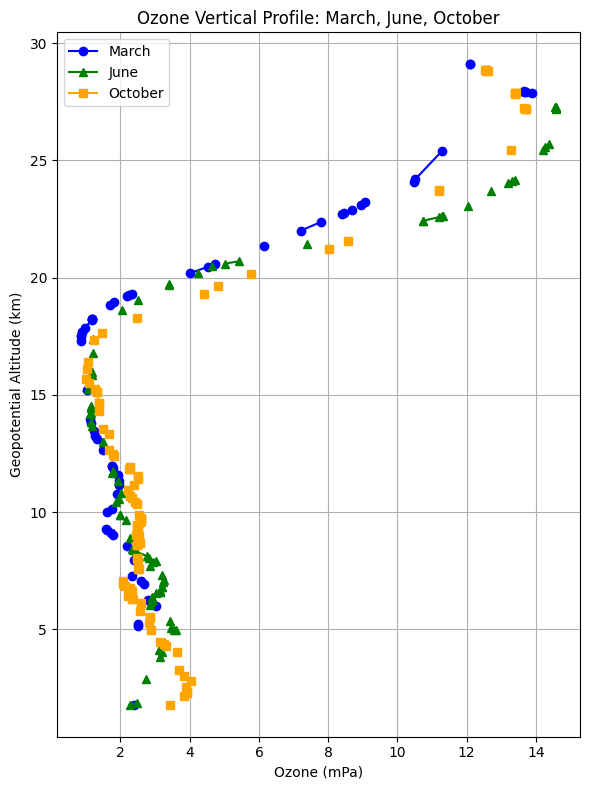

In [33]:
import matplotlib.pyplot as plt

# Ensure GeopAlt is numeric and sorted
final_df['GeopAlt'] = pd.to_numeric(final_df['GeopAlt'], errors='coerce')
final_df = final_df.sort_values('GeopAlt')

# Drop rows with missing altitude
final_df = final_df.dropna(subset=['GeopAlt'])

# Plot ozone vertical profiles
plt.figure(figsize=(6, 8))

plt.plot(final_df['March_Avrg_O3'], final_df['GeopAlt'], label='March', color='blue', marker='o')
plt.plot(final_df['June_Avrg_O3'], final_df['GeopAlt'], label='June', color='green', marker='^')
plt.plot(final_df['Oct_Avrg_O3'], final_df['GeopAlt'], label='October', color='orange', marker='s')


# Labels and styling
plt.xlabel('Ozone (mPa)')
plt.ylabel('Geopotential Altitude (km)')
plt.title('Ozone Vertical Profile: March, June, October')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


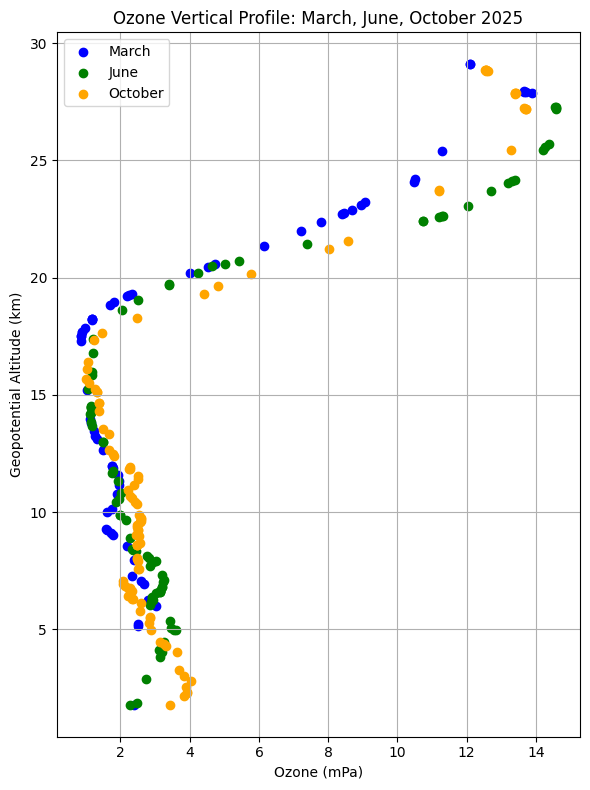

In [36]:
import matplotlib.pyplot as plt

# Ensure GeopAlt is numeric and sorted
final_df['GeopAlt'] = pd.to_numeric(final_df['GeopAlt'], errors='coerce')
final_df = final_df.sort_values('GeopAlt')

# Drop rows with missing altitude
final_df = final_df.dropna(subset=['GeopAlt'])

# Plot ozone vertical profiles as scatter plots
plt.figure(figsize=(6, 8))

plt.scatter(final_df['March_Avrg_O3'], final_df['GeopAlt'], label='March', color='blue', marker='o')
plt.scatter(final_df['June_Avrg_O3'], final_df['GeopAlt'], label='June', color='green', marker='o')
plt.scatter(final_df['Oct_Avrg_O3'], final_df['GeopAlt'], label='October', color='orange', marker='o')

# Labels and styling
plt.xlabel('Ozone (mPa)')
plt.ylabel('Geopotential Altitude (km)')
plt.title('Ozone Vertical Profile: March, June, October 2025')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


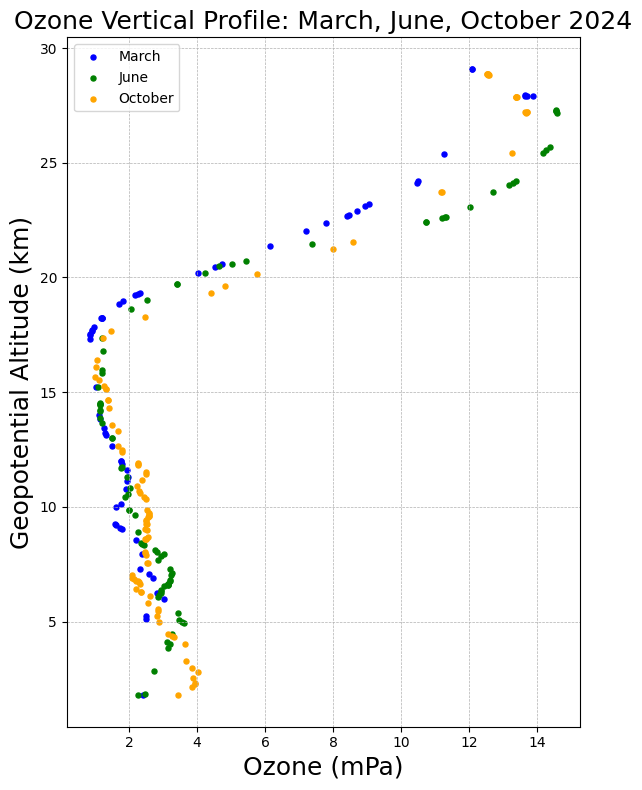

In [50]:
import matplotlib.pyplot as plt

# Ensure GeopAlt is numeric and sorted
final_df['GeopAlt'] = pd.to_numeric(final_df['GeopAlt'], errors='coerce')
final_df = final_df.sort_values('GeopAlt')
final_df = final_df.dropna(subset=['GeopAlt'])

# Plot ozone vertical profiles as scatter plots
plt.figure(figsize=(6, 8))

# March
plt.scatter(final_df['March_Avrg_O3'], final_df['GeopAlt'],
            label='March', color='blue', marker='o', s=13)  # s is marker size

# June
plt.scatter(final_df['June_Avrg_O3'], final_df['GeopAlt'],
            label='June', color='green', marker='o', s=13)

# October
plt.scatter(final_df['Oct_Avrg_O3'], final_df['GeopAlt'],
            label='October', color='orange', marker='o', s=13)

# Labels and styling
plt.xlabel('Ozone (mPa)', fontsize=18)
plt.ylabel('Geopotential Altitude (km)', fontsize=18)
plt.title('Ozone Vertical Profile: March, June, October 2024', fontsize=18)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assume df2 already exists from your earlier processing
# Remove rows where all three ozone values are missing
df_plot = df2.dropna(subset=['March_Avrg_O3', 'June_Avrg_O3', 'Oct_Avrg_O3'], how='all')

# Ensure GeopAlt is not missing and sort
df_plot = df_plot.dropna(subset=['GeopAlt'])
df_plot = df_plot.sort_values(by='GeopAlt')

# Start plot
plt.figure(figsize=(6, 8))

# Plot each month's ozone concentration vertically (altitude on Y-axis)
if 'March_Avrg_O3' in df_plot.columns:
    plt.plot(df_plot['March_Avrg_O3'], df_plot['GeopAlt'],
             label='March', color='blue', linewidth=2)

if 'June_Avrg_O3' in df_plot.columns:
    plt.plot(df_plot['June_Avrg_O3'], df_plot['GeopAlt'],
             label='June', color='green', linewidth=2)

if 'Oct_Avrg_O3' in df_plot.columns:
    plt.plot(df_plot['Oct_Avrg_O3'], df_plot['GeopAlt'],
             label='October', color='orange', linewidth=2)

# Axis labels and title
plt.ylabel('Geopotential Altitude (km)', fontsize=12)
plt.xlabel('Ozone Concentration (mPa)', fontsize=12)
plt.title('Vertical Ozone Profiles – March, June, October', fontsize=14)

# Invert Y-axis so higher altitudes are at the top
plt.gca().invert_yaxis()

# Grid and legend
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='best', fontsize=10)
plt.tight_layout()

# Display the plot
plt.show()



NameError: name 'df2' is not defined

In [ ]:
import pandas as pd
df = pd.read_csv('brewer.csv')
print(df)

       DATE  DS (DU)  ZC (DU)
0    Jan-06    269.6    261.6
1    Jan-07    271.1    260.4
2    Jan-08    272.8    254.8
3    Jan-09    270.1    263.8
4    Jan-10    268.4    258.2
..      ...      ...      ...
138  May-24    265.7    265.6
139  May-25    266.0    265.5
140  May-26      NaN    268.6
141  May-27    268.1    265.0
142  May-28    272.0    263.8

[143 rows x 3 columns]


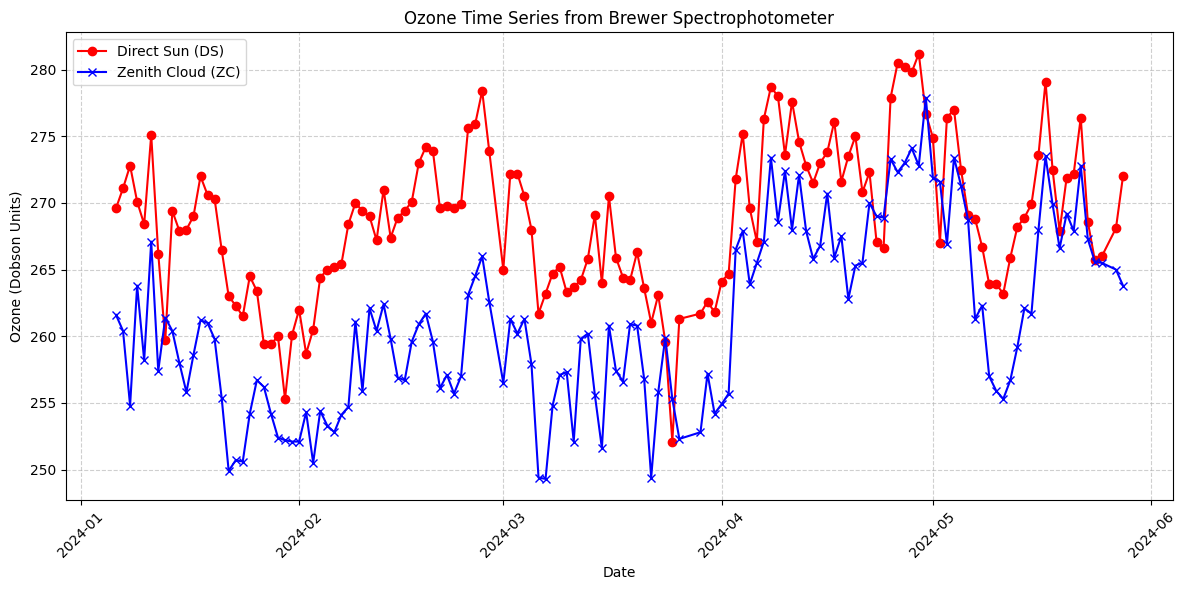

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Load the data
df = pd.read_csv('brewer.csv')

# Parse 'DATE' column by adding year 2024 (assumed)
def parse_date(d):
    try:
        return datetime.strptime(d + '-2024', '%b-%d-%Y')
    except:
        return pd.NaT

df['DATE'] = df['DATE'].apply(parse_date)

# Drop rows where date is invalid or DS or ZC is missing
df = df.dropna(subset=['DATE', 'DS (DU)', 'ZC (DU)'])

# Sort by date
df = df.sort_values('DATE')

# Plot time series
plt.figure(figsize=(12, 6))
plt.plot(df['DATE'], df['DS (DU)'], label='Direct Sun (DS)', marker='o', color='red')
plt.plot(df['DATE'], df['ZC (DU)'], label='Zenith Cloud (ZC)', marker='x', color='blue')

plt.title('Ozone Time Series from Brewer Spectrophotometer')
plt.xlabel('Date')
plt.ylabel('Ozone (Dobson Units)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


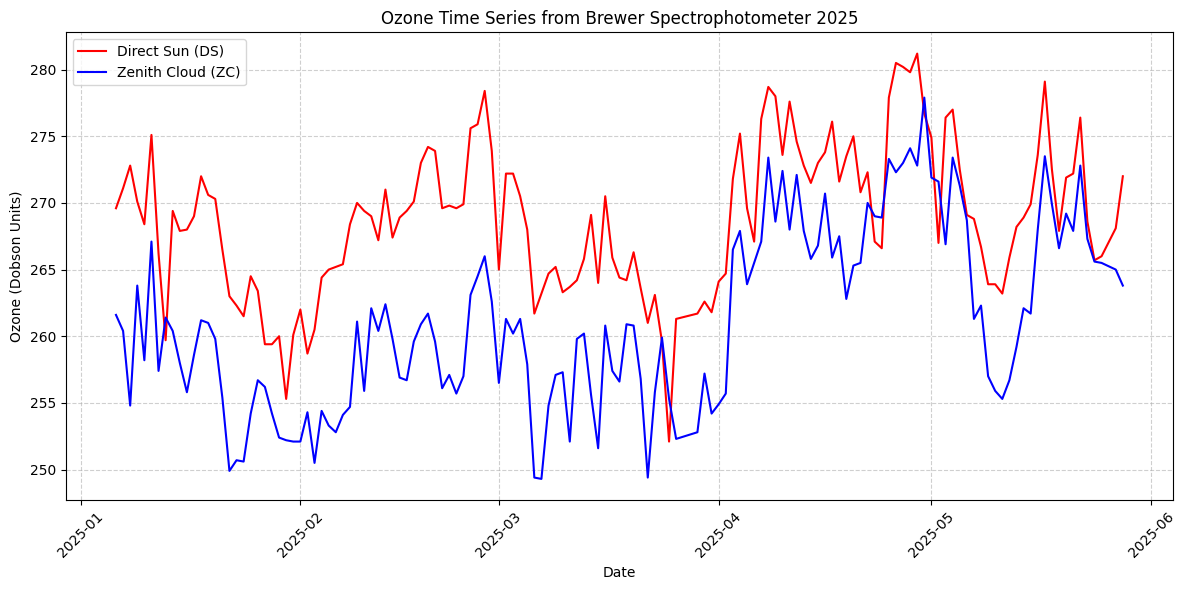

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Load the data
df = pd.read_csv('brewer.csv')

# Parse 'DATE' column by adding year 2024 (assumed)
def parse_date(d):
    try:
        return datetime.strptime(d + '-2025', '%b-%d-%Y')
    except:
        return pd.NaT

df['DATE'] = df['DATE'].apply(parse_date)

# Drop rows where date is invalid or DS or ZC is missing
df = df.dropna(subset=['DATE', 'DS (DU)', 'ZC (DU)'])

# Sort by date
df = df.sort_values('DATE')

# Plot time series without markers
plt.figure(figsize=(12, 6))
plt.plot(df['DATE'], df['DS (DU)'], label='Direct Sun (DS)', color='red')  # no marker here
plt.plot(df['DATE'], df['ZC (DU)'], label='Zenith Cloud (ZC)', color='blue')  # no marker here

plt.title('Ozone Time Series from Brewer Spectrophotometer 2025')
plt.xlabel('Date')
plt.ylabel('Ozone (Dobson Units)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
df = pd.read_csv('dobson.csv')
print(df)

      DATE  DS (DU)  ZC (DU)
0   Jan-06    258.3      NaN
1   Jan-07    257.6      NaN
2   Jan-08    258.4      NaN
3   Jan-09    261.0      NaN
4   Jan-10    253.9    263.8
..     ...      ...      ...
87  May-32    260.5    258.3
88  May-35      NaN    256.6
89  May-38    259.7    255.0
90  May-41    264.7    261.1
91  May-44    259.8    248.7

[92 rows x 3 columns]


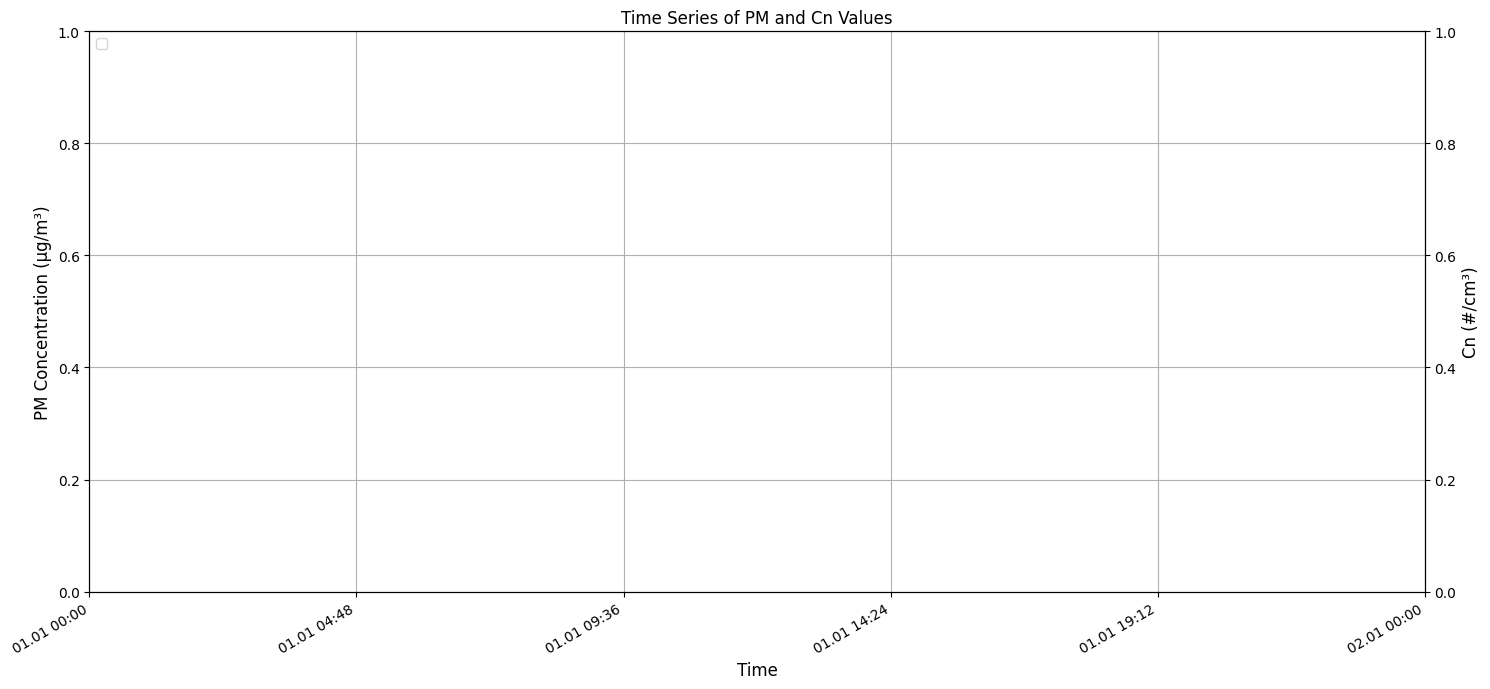

In [11]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Define PM columns and Cn column
pm_cols = ['PM1', 'PM2.5', 'PM4', 'PM10', 'PMtot']
cn_col = 'Cn'

# Create the plot
fig, ax1 = plt.subplots(figsize=(15, 7))

# Plot PM values on the primary y-axis
for col in pm_cols:
    if col in df.columns and df[col].notna().any():
        ax1.plot(df.index, df[col], label=col)

# Label the primary y-axis
ax1.set_ylabel('PM Concentration (µg/m³)', fontsize=12)
ax1.set_xlabel('Time', fontsize=12)
ax1.tick_params(axis='y')
ax1.grid(True)

# Create a secondary y-axis
ax2 = ax1.twinx()

# Plot Cn on the secondary y-axis
if cn_col in df.columns and df[cn_col].notna().any():
    ax2.plot(df.index, df[cn_col], color='black', linestyle='--', label='Cn', linewidth=2)

# Label the secondary y-axis
ax2.set_ylabel('Cn (#/cm³)', fontsize=12)
ax2.tick_params(axis='y')

# Format the x-axis
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m %H:%M'))
fig.autofmt_xdate()

# Combine legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

# Finalize the layout
plt.title('Time Series of PM and Cn Values')
plt.tight_layout()
plt.show()


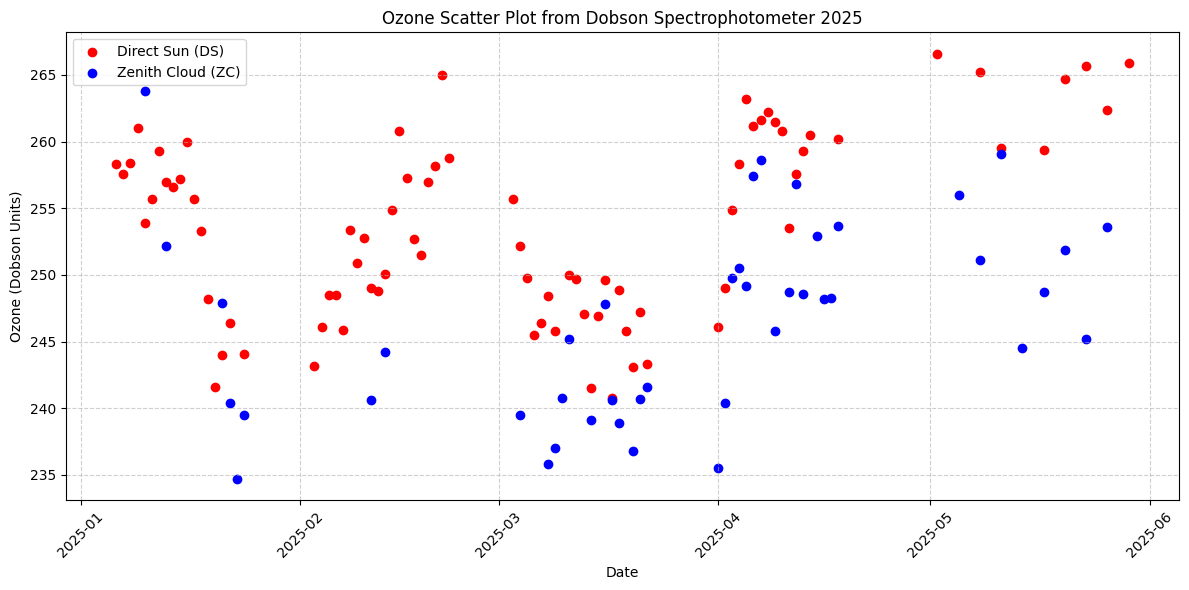

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Load the data
df = pd.read_csv('dobson.csv')  # Replace with your actual CSV path

# Parse 'DATE' column by appending a year (assuming 2025)
def parse_date(d):
    try:
        return datetime.strptime(d + '-2025', '%b-%d-%Y')
    except:
        return pd.NaT

df['DATE'] = df['DATE'].apply(parse_date)

# Drop rows with invalid dates
df = df.dropna(subset=['DATE'])

# Sort by date
df = df.sort_values('DATE')

# Plot
plt.figure(figsize=(12, 6))
plt.scatter(df['DATE'], df['DS (DU)'], label='Direct Sun (DS)', color='red')
plt.scatter(df['DATE'], df['ZC (DU)'], label='Zenith Cloud (ZC)', color='blue')

plt.title('Ozone Scatter Plot from Dobson Spectrophotometer 2025')
plt.xlabel('Date')
plt.ylabel('Ozone (Dobson Units)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Files read: 834
Total lines read: 12625
Valid entries parsed: 12625


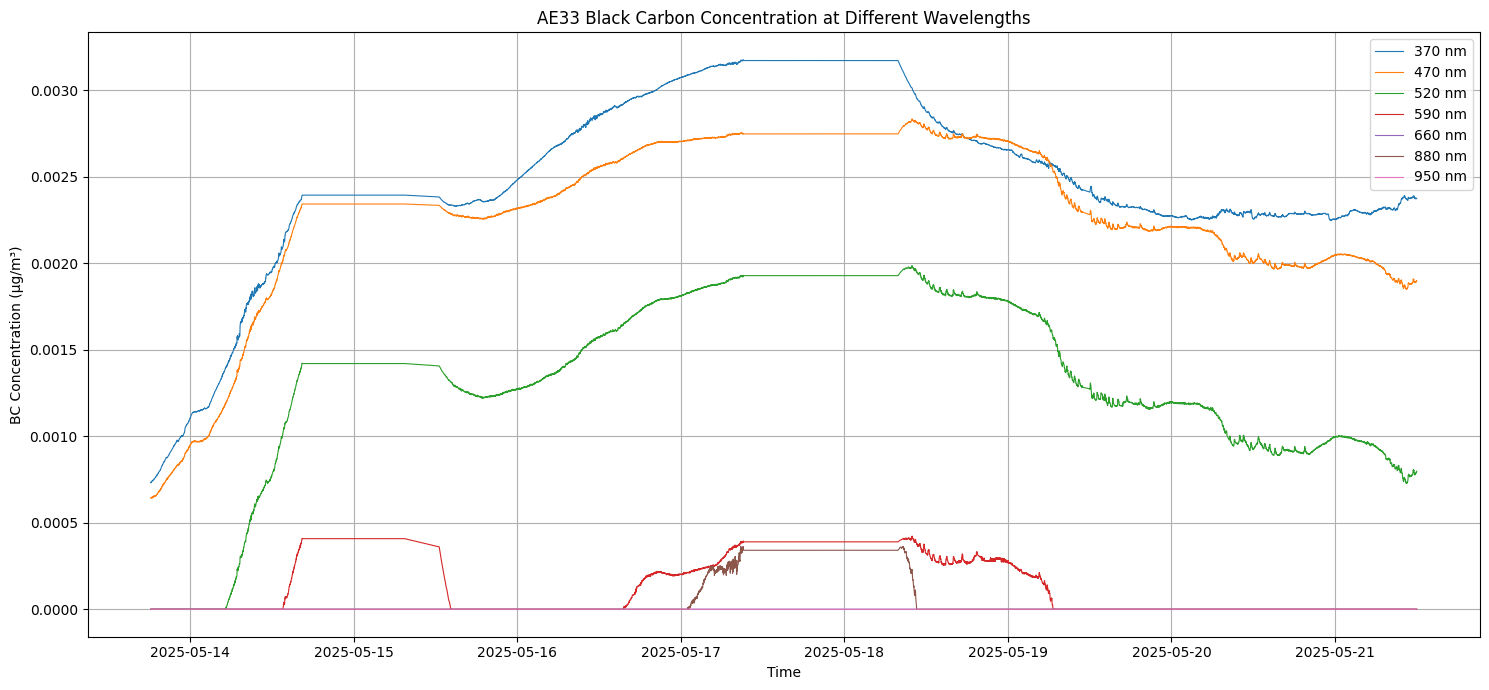

In [25]:
import os
import matplotlib.pyplot as plt
from datetime import datetime

base_folder = "aethalometer"

# Remap wavelengths to the correct indices based on your snippet.
# According to your snippet, the absorption coefficients are in columns 48–54 (0-based indexing)
# corresponding to wavelengths 370, 470, 520, 590, 660, 880, and 950 nm.
wavelengths = {
    370: 48,
    470: 49,
    520: 50,
    590: 51,
    660: 52,
    880: 53,
    950: 54,
}

# Example conversion factors (in µg/m³ per raw unit)
# Adjust these with your instrument's calibrated factors.
conversion_factors = {
    370: 1.2,
    470: 1.1,
    520: 1.0,
    590: 0.9,
    660: 0.8,
    880: 0.75,
    950: 0.7,
}

data_points = []
files_read = 0
lines_read = 0
valid_entries = 0

for root, _, files in os.walk(base_folder):
    for file in files:
        filepath = os.path.join(root, file)
        files_read += 1
        try:
            with open(filepath, 'r') as f:
                # If your files have a header row, uncomment the next line:
                # next(f)
                for line in f:
                    lines_read += 1
                    parts = line.strip().split('|')
                    if len(parts) >= max(wavelengths.values()) + 1:
                        try:
                            timestamp = datetime.strptime(parts[2], "%m/%d/%Y %I:%M:%S %p")
                            bc_values = {}
                            for wl, idx in wavelengths.items():
                                try:
                                    raw_value = float(parts[idx])
                                    bc_concentration = raw_value * conversion_factors[wl]
                                    if bc_concentration < 0:
                                        bc_concentration = 0
                                    bc_values[wl] = bc_concentration
                                except ValueError as ve:
                                    print(f"Error converting at wavelength {wl} on line {lines_read} in {filepath}: {ve}")
                                    bc_values[wl] = None
                            
                            if all(value is not None for value in bc_values.values()):
                                data_points.append((timestamp, bc_values))
                                valid_entries += 1
                        except ValueError as ve:
                            print(f"Timestamp parse error in file {filepath} on line {lines_read}: {ve}")
                    else:
                        print(f"Skipped line in {filepath} on line {lines_read}: not enough fields.")
        except Exception as e:
            print(f"Error reading {filepath}: {e}")

print(f"Files read: {files_read}")
print(f"Total lines read: {lines_read}")
print(f"Valid entries parsed: {valid_entries}")

if valid_entries == 0:
    print("No valid BC data found.")
else:
    data_points.sort(key=lambda x: x[0])
    timestamps = [dp[0] for dp in data_points]
    bc_by_wavelength = {wl: [dp[1][wl] for dp in data_points] for wl in wavelengths}
    
    plt.figure(figsize=(15, 7))
    for wl in sorted(wavelengths.keys()):
        # Plot as normal thin lines (no markers) with a slightly reduced linewidth.
        plt.plot(timestamps, bc_by_wavelength[wl], linewidth=0.8, label=f"{wl} nm")
    
    plt.xlabel("Time")
    plt.ylabel("BC Concentration (µg/m³)")
    plt.title("AE33 Black Carbon Concentration at Different Wavelengths")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()



🔍 Checking available files in 'surface' folder:
 - tei49i-202505141200.dat
 - tei49i-202505141300.dat
 - tei49i-202505141400.dat
 - tei49i-202505141500.dat
 - tei49i-202505141600.dat
 - tei49i-202505141700.dat
 - tei49i-202505141900.dat
 - tei49i-202505142000.dat
 - tei49i-202505142100.dat
 - tei49i-202505142200.dat
 - tei49i-202505142300.dat
 - tei49i-202505150000.dat
 - tei49i-202505150100.dat
 - tei49i-202505150200.dat
 - tei49i-202505150300.dat
 - tei49i-202505150400.dat
 - tei49i-202505150500.dat
 - tei49i-202505150600.dat
 - tei49i-202505150700.dat
 - tei49i-202505161300.dat
 - tei49i-202505161400.dat
 - tei49i-202505161500.dat
 - tei49i-202505161600.dat
 - tei49i-202505161700.dat
 - tei49i-202505161800.dat
 - tei49i-202505161900.dat
 - tei49i-202505162000.dat
 - tei49i-202505162100.dat
 - tei49i-202505162200.dat
 - tei49i-202505162300.dat
 - tei49i-202505170000.dat
 - tei49i-202505170100.dat
 - tei49i-202505170200.dat
 - tei49i-202505170300.dat
 - tei49i-202505170400.dat
 - tei

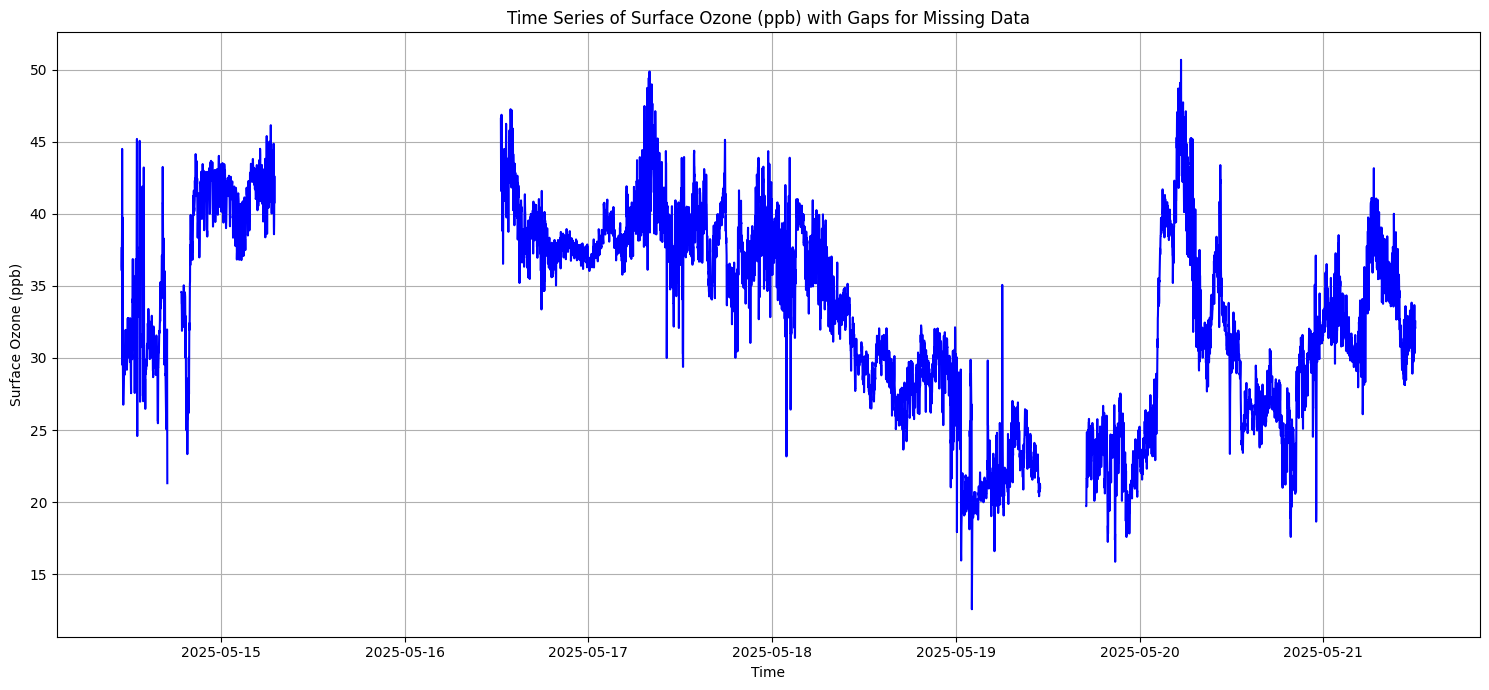

In [ ]:
print("\n🔍 Checking timestamps for May 14th and May 16th before plotting:")
found_14th = False
found_16th = False

for dp in data_points:
    if dp[0].date() == datetime(2025, 5, 14).date():
        found_14th = True
    if dp[0].date() == datetime(2025, 5, 16).date():
        found_16th = True

print(f"✅ May 14th found in dataset: {found_14th}")
print(f"✅ May 16th found in dataset: {found_16th}")



🔍 Sample data points for May 14th:
(datetime.datetime(2025, 5, 14, 11, 1, 42), 37.622)
(datetime.datetime(2025, 5, 14, 11, 2), 36.368)
(datetime.datetime(2025, 5, 14, 11, 3, 1), 36.069)
(datetime.datetime(2025, 5, 14, 11, 4, 1), 37.868)
(datetime.datetime(2025, 5, 14, 11, 5, 1), 38.69)
(datetime.datetime(2025, 5, 14, 11, 6, 1), 44.506)
(datetime.datetime(2025, 5, 14, 11, 7), 39.773)
(datetime.datetime(2025, 5, 14, 11, 8, 1), 29.521)
(datetime.datetime(2025, 5, 14, 11, 9, 1), 33.951)
(datetime.datetime(2025, 5, 14, 11, 10, 1), 39.738)
(datetime.datetime(2025, 5, 14, 11, 11, 1), 33.689)
(datetime.datetime(2025, 5, 14, 11, 12), 29.345)
(datetime.datetime(2025, 5, 14, 11, 13, 1), 27.596)
(datetime.datetime(2025, 5, 14, 11, 14), 27.21)
(datetime.datetime(2025, 5, 14, 11, 15, 1), 26.759)
(datetime.datetime(2025, 5, 14, 11, 16, 1), 27.134)
(datetime.datetime(2025, 5, 14, 11, 17), 27.247)
(datetime.datetime(2025, 5, 14, 11, 18, 1), 28.134)
(datetime.datetime(2025, 5, 14, 11, 19), 28.134)
(dat

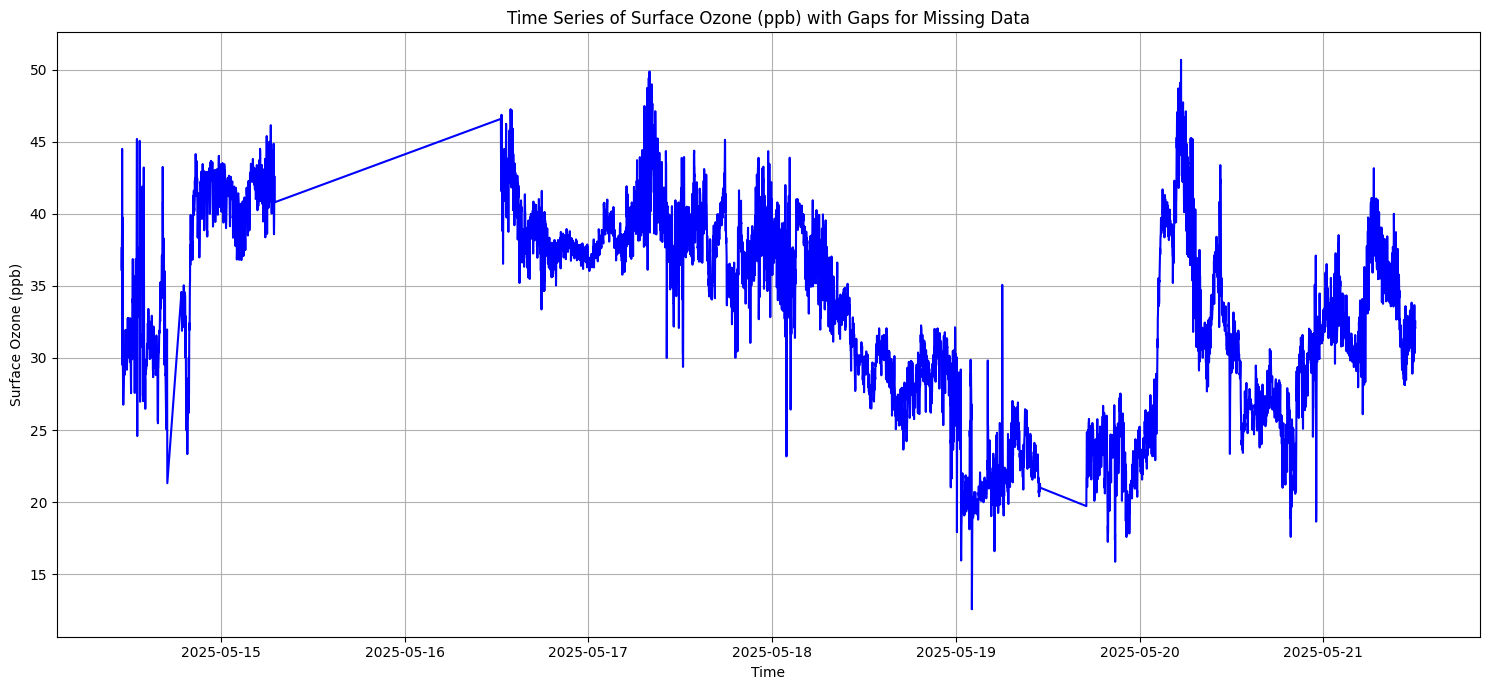

In [36]:
# Debugging: Print first few entries for May 14th
print("\n🔍 Sample data points for May 14th:")
for dp in data_points:
    if dp[0].date() == datetime(2025, 5, 14).date():
        print(dp)
data_points.sort(key=lambda x: x[0])  # Sort purely by time to maintain full continuity

plt.figure(figsize=(15, 7))
plt.plot([dp[0] for dp in data_points], [dp[1] for dp in data_points], color='blue')
plt.xlabel("Time")
plt.ylabel("Surface Ozone (ppb)")
plt.title("Time Series of Surface Ozone (ppb) with Gaps for Missing Data")
plt.grid(True)
plt.tight_layout()
plt.show()





🔍 Checking available files in 'surface' folder:
 - tei49i-202505141200.dat
 - tei49i-202505141300.dat
 - tei49i-202505141400.dat
 - tei49i-202505141500.dat
 - tei49i-202505141600.dat
 - tei49i-202505141700.dat
 - tei49i-202505141900.dat
 - tei49i-202505142000.dat
 - tei49i-202505142100.dat
 - tei49i-202505142200.dat
 - tei49i-202505142300.dat
 - tei49i-202505150000.dat
 - tei49i-202505150100.dat
 - tei49i-202505150200.dat
 - tei49i-202505150300.dat
 - tei49i-202505150400.dat
 - tei49i-202505150500.dat
 - tei49i-202505150600.dat
 - tei49i-202505150700.dat
 - tei49i-202505161300.dat
 - tei49i-202505161400.dat
 - tei49i-202505161500.dat
 - tei49i-202505161600.dat
 - tei49i-202505161700.dat
 - tei49i-202505161800.dat
 - tei49i-202505161900.dat
 - tei49i-202505162000.dat
 - tei49i-202505162100.dat
 - tei49i-202505162200.dat
 - tei49i-202505162300.dat
 - tei49i-202505170000.dat
 - tei49i-202505170100.dat
 - tei49i-202505170200.dat
 - tei49i-202505170300.dat
 - tei49i-202505170400.dat
 - tei

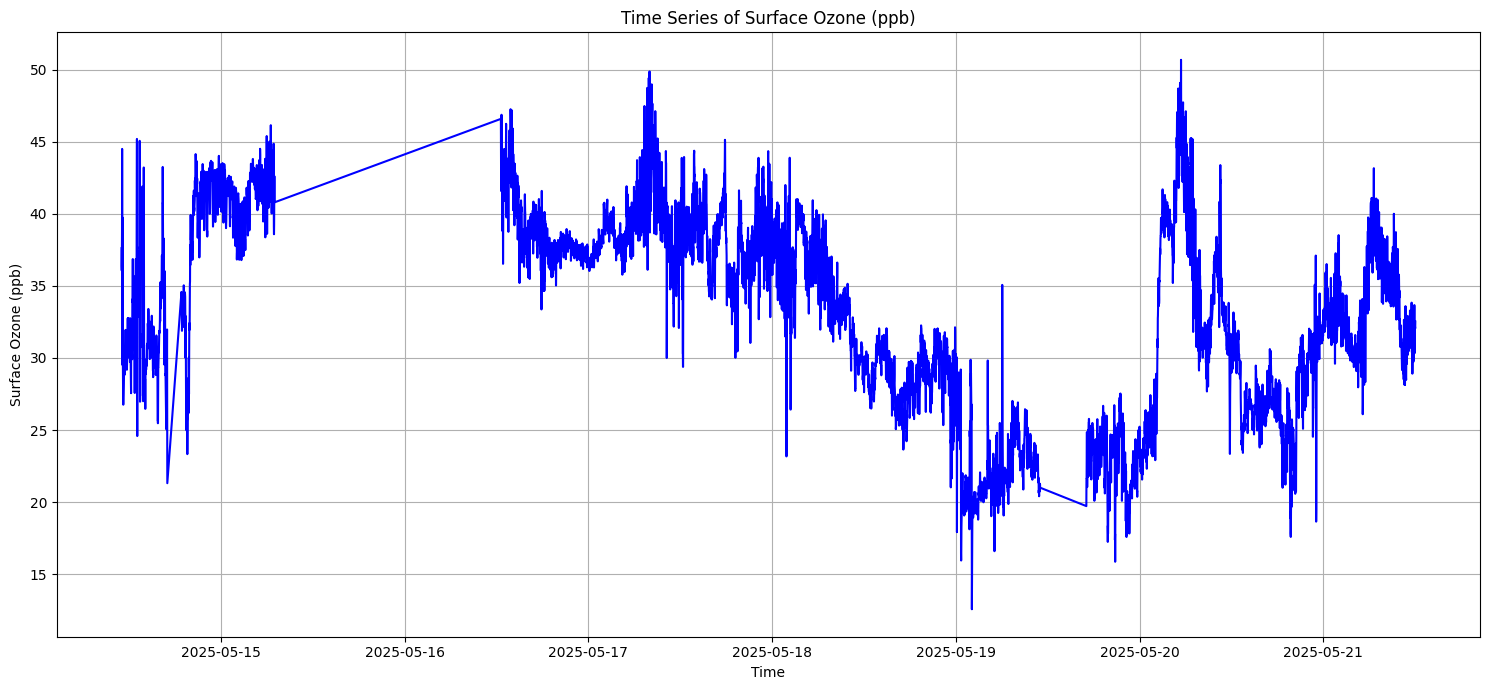

In [37]:
import os
import matplotlib.pyplot as plt
from datetime import datetime

# Folder containing hourly surface ozone data files
base_folder = "surface"

data_points = []  # List to store (timestamp, ozone_ppb)
files_read = 0
lines_read = 0

# List all files in the folder (sorted for predictable order)
print("\n🔍 Checking available files in 'surface' folder:")
all_files = sorted(os.listdir(base_folder))
for file in all_files:
    print(f" - {file}")

# Read all files and parse data
for file in all_files:
    filepath = os.path.join(base_folder, file)
    files_read += 1
    try:
        with open(filepath, "r") as f:
            first_timestamp_in_file = None
            for line_num, line in enumerate(f):
                line = line.strip()
                if not line:
                    continue  # skip blank lines

                parts = line.split()
                # Skip header if the first token is "pcdate"
                if line_num == 0 and parts[0].lower() == "pcdate":
                    continue

                try:
                    # Combine the first two columns into a timestamp string.
                    dt_str = f"{parts[0]} {parts[1]}"
                    # Timestamp format: "2025-05-14 11:01:42"
                    timestamp = datetime.strptime(dt_str, "%Y-%m-%d %H:%M:%S")
                    ozone_ppb = float(parts[5])
                    
                    data_points.append((timestamp, ozone_ppb))
                    lines_read += 1
                    
                    if first_timestamp_in_file is None:
                        first_timestamp_in_file = timestamp
                except Exception as e:
                    print(f"❌ Error parsing line {line_num} in {filepath}: {line}\n{e}")
            if first_timestamp_in_file:
                print(f"✔ Processed {file} - First timestamp: {first_timestamp_in_file}")
    except Exception as e:
        print(f"❌ Error reading file {filepath}: {e}")

print(f"\nFiles read: {files_read}")
print(f"Total valid data lines read: {lines_read}")

# Debug: Print sample data points for May 14th and May 16th
print("\n🔍 Sample data points for May 14th:")
for dp in data_points:
    if dp[0].date() == datetime(2025, 5, 14).date():
        print(dp)

print("\n🔍 Sample data points for May 16th:")
for dp in data_points:
    if dp[0].date() == datetime(2025, 5, 16).date():
        print(dp)

# Verify that May 14th and May 16th are in the final dataset
found_14th = any(dp[0].date() == datetime(2025, 5, 14).date() for dp in data_points)
found_16th = any(dp[0].date() == datetime(2025, 5, 16).date() for dp in data_points)
print(f"\n✅ May 14th in final data: {found_14th}")
print(f"✅ May 16th in final data: {found_16th}")

if not data_points:
    print("No valid ozone data found!")
else:
    # Sort the data purely by timestamp
    data_points.sort(key=lambda x: x[0])
    
    # Debug: Print first few timestamps to verify overall sorting
    print("\n🔍 First 10 timestamps in final dataset:")
    for dp in data_points[:10]:
        print(dp[0])
    
    # Plot the continuous time series without segmentation.
    plt.figure(figsize=(15, 7))
    plt.plot([dp[0] for dp in data_points], [dp[1] for dp in data_points], color='blue')
    plt.xlabel("Time")
    plt.ylabel("Surface Ozone (ppb)")
    plt.title("Time Series of Surface Ozone (ppb)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


C:\Users\Frank Mutuku\AppData\Local\Temp\ipykernel_9608\3568558927.py:7: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv('fidas.txt', sep='\t', header=0, index_col=False, engine='python')


Raw column names: ['date', 'time', 'comment', 'PM1', 'PM2.5', 'PM4', 'PM10', 'PMtot', 'Cn', 'rH', 'T', 'p', 'status flow', 'status coinc.', 'status pumps', 'status w.-statation', 'status IADS', 'status calib.', 'status LED', 'status op.-modus', 'modus', 'alt. PM#1', 'alt. PM#2', 'alt. PM#3', 'alt. PM#4', 'alt. PM#5', 'alt. PM#6', 'alt. PM#7', 'alt. PM#8', 'alt. PM#9', 'alt. PM#10', 'alt. PM#11', 'alt. PM#12', 'alt. PM#13', 'flowrate', 'velocity', 'coincidence', 'pump output', 'IADS T', 'channel deviation', 'Unnamed: 40', 'Unnamed: 41']
Cleaned column names: ['date', 'time', 'comment', 'pm1', 'pm2.5', 'pm4', 'pm10', 'pmtot', 'cn', 'rh', 't', 'p', 'status flow', 'status coinc.', 'status pumps', 'status w.-statation', 'status iads', 'status calib.', 'status led', 'status op.-modus', 'modus', 'alt. pm#1', 'alt. pm#2', 'alt. pm#3', 'alt. pm#4', 'alt. pm#5', 'alt. pm#6', 'alt. pm#7', 'alt. pm#8', 'alt. pm#9', 'alt. pm#10', 'alt. pm#11', 'alt. pm#12', 'alt. pm#13', 'flowrate', 'velocity', 'co

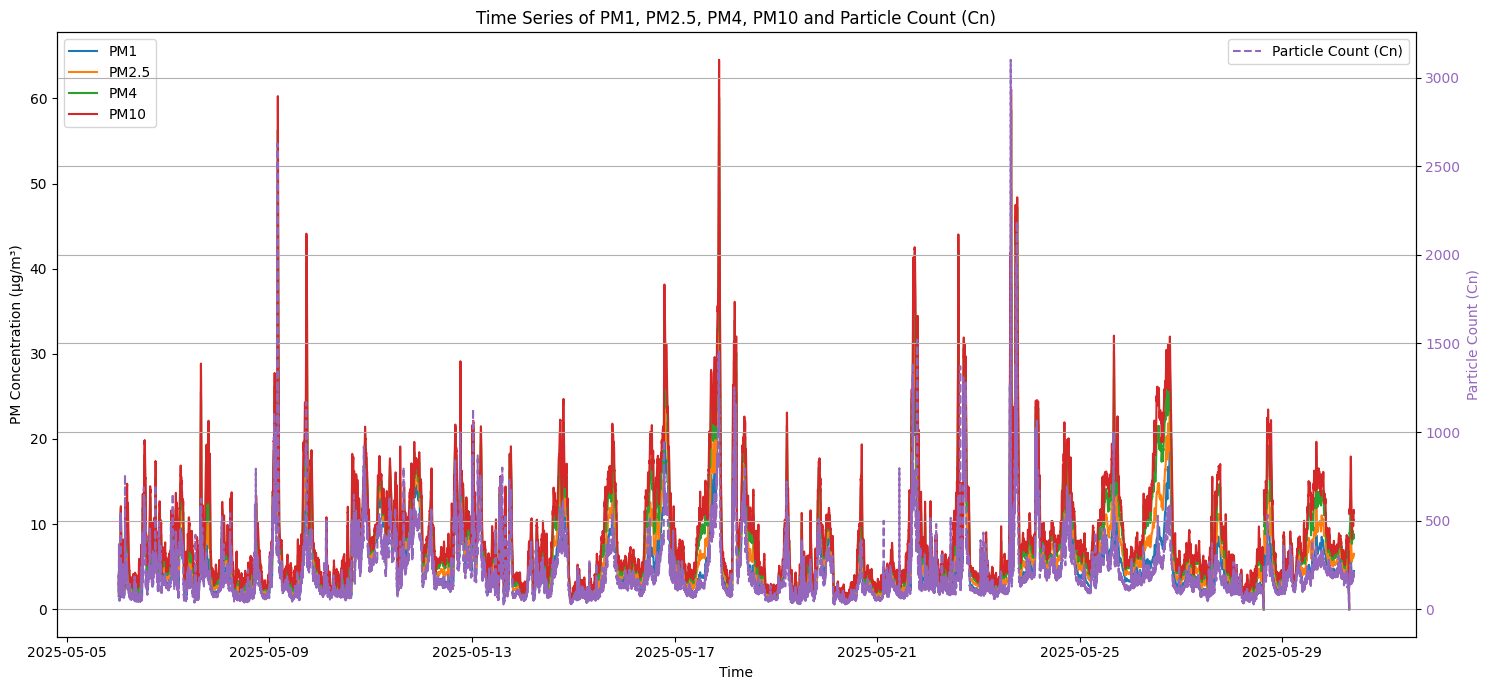

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Step 1: Read the File Using read_csv with Tab Separator ---
# We explicitly specify index_col=False to ensure that no column is used as the index.
try:
    df = pd.read_csv('fidas.txt', sep='\t', header=0, index_col=False, engine='python')
except Exception as e:
    print("Error reading file with sep='\\t':", e)
    raise

# --- Step 2: Inspect and Clean Column Names ---
# Print the raw column names for diagnostics.
print("Raw column names:", df.columns.tolist())

# Clean by stripping extra spaces and converting to lower case.
df.columns = df.columns.str.strip().str.lower()
print("Cleaned column names:", df.columns.tolist())

# --- Diagnostic: Display the first few rows ---
print("\nData Snapshot:")
print(df.head())
print("\nDataFrame Info:")
print(df.info())

# At this point, we expect columns 'date' and 'time' to exist.
if 'date' not in df.columns or 'time' not in df.columns:
    raise KeyError("Expected columns 'date' and 'time' not found in the DataFrame.")

# --- Step 3: Create a Datetime Column ---
# Convert 'date' and 'time' to strings and strip any extra spaces.
df['date'] = df['date'].astype(str).str.strip()
df['time'] = df['time'].astype(str).str.strip()

# Combine 'date' and 'time' into one column and convert using the known format:
# Example: "06.05.2025 00:37:00" → day.month.year hour:minute:second.
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'],
                                format="%d.%m.%Y %H:%M:%S",
                                errors='coerce')

print("\nParsed datetime values:")
print(df['datetime'].head())

# Drop any rows that failed to parse into a valid datetime.
df = df.dropna(subset=['datetime'])

# --- Step 4: Convert PM and Particle Count Columns to Numeric ---
# We plan to plot PM1, PM2.5, PM4, PM10 on the primary y-axis and Cn on the secondary.
numeric_cols = ['pm1', 'pm2.5', 'pm4', 'pm10', 'cn']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print("\nNumeric PM and Particle Count Snapshot:")
print(df[numeric_cols].head())

# --- Step 5: Sort the DataFrame by Datetime ---
df.sort_values('datetime', inplace=True)
print(f"\nDate range: {df['datetime'].min()} to {df['datetime'].max()}")
print(f"Total rows after cleaning: {len(df)}")

# --- Step 6: Plot the Data ---
# Create a figure with two y-axes: one for PM values and one for Particle Count.
fig, ax1 = plt.subplots(figsize=(15, 7))

# Plot PM1, PM2.5, PM4, and PM10 on the primary y-axis.
ax1.plot(df['datetime'], df['pm1'], label='PM1', color='tab:blue')
ax1.plot(df['datetime'], df['pm2.5'], label='PM2.5', color='tab:orange')
ax1.plot(df['datetime'], df['pm4'], label='PM4', color='tab:green')
ax1.plot(df['datetime'], df['pm10'], label='PM10', color='tab:red')
ax1.set_xlabel("Time")
ax1.set_ylabel("PM Concentration (µg/m³)", color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.legend(loc='upper left')

# Plot Particle Count (cn) on the secondary y-axis.
ax2 = ax1.twinx()
ax2.plot(df['datetime'], df['cn'], label='Particle Count (Cn)', color='tab:purple', linestyle='--')
ax2.set_ylabel("Particle Count (Cn)", color='tab:purple')
ax2.tick_params(axis='y', labelcolor='tab:purple')
ax2.legend(loc='upper right')

plt.title("Time Series of PM1, PM2.5, PM4, PM10 and Particle Count (Cn)")
plt.grid(True)
plt.tight_layout()
plt.show()
